## InfoPillar Solution Pvt Ltd
## IPS Remote Internship
## Task - 1 : Loan Prediction using Machine Learning
Project idea – The idea behind this ML project is to build a model that will classify how much loan the user can take.<BR>
AUTHOR : POOJA SHARMA<BR>
Dataset:
http://lib.stat.cmu.edu/datasets/boston<BR>
Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.shape

(506, 15)

In [ ]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [ ]:
boston = load_boston()

#Check out the Data
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
print(boston.target.shape)
print(boston.feature_names)

(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
boston.data.shape

(506, 13)

In [ ]:
## Adding 'Price' (target) column to the data
df['PRICE']=boston.target
print(df.head())

   Unnamed: 0     crim    zn  indus  chas  ...  ptratio   black  lstat  medv  PRICE
0           1  0.00632  18.0   2.31     0  ...     15.3  396.90   4.98  24.0   24.0
1           2  0.02731   0.0   7.07     0  ...     17.8  396.90   9.14  21.6   21.6
2           3  0.02729   0.0   7.07     0  ...     17.8  392.83   4.03  34.7   34.7
3           4  0.03237   0.0   2.18     0  ...     18.7  394.63   2.94  33.4   33.4
4           5  0.06905   0.0   2.18     0  ...     18.7  396.90   5.33  36.2   36.2

[5 rows x 16 columns]


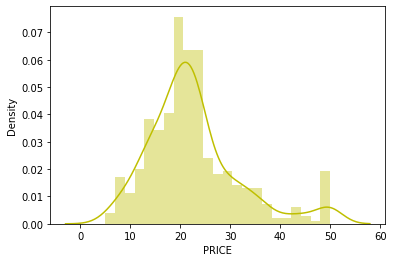

In [ ]:
sns.distplot(df['PRICE'],color='y')

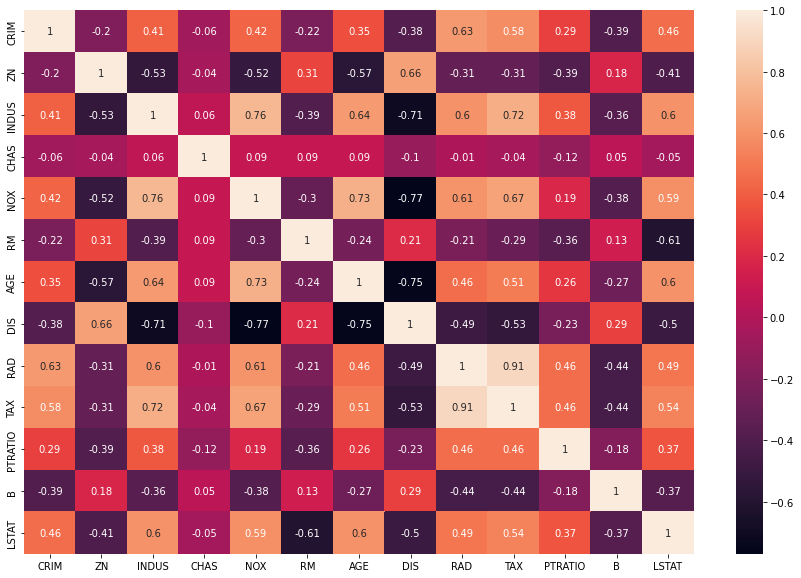

In [ ]:
boston_1=pd.DataFrame(boston.data, columns=boston.feature_names)

correlation_matrix=boston_1.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X=df.iloc[ :, :-1].values
Y=df.iloc[ :, -1].values

print('Shape of X is',X.shape)
print('Shape of Y is',Y.shape)

Shape of X is (506, 15)
Shape of Y is (506,)


In [ ]:
#splitting train and test datasets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('Shape of X_train is', X_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of Y_train is', Y_train.shape)

Shape of X_train is (404, 15)
Shape of X_test is (102, 15)
Shape of Y_train is (404,)


In [ ]:
#separating valid datasets from train datasets
#X_train = training variable
#X_test = testing variable
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)
print('Shape of X_train is', X_train.shape)
print('Shape of X_valid is', X_valid.shape)
print('Shape of Y_train is', Y_train.shape)
print('Shape of Y_valid is', Y_valid.shape)

Shape of X_train is (323, 15)
Shape of X_valid is (81, 15)
Shape of Y_train is (323,)
Shape of Y_valid is (81,)


In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train, Y_train)
pred_test=linear.predict(X_test)
pred_train=linear.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_train, pred_train)))

4.0268671062928155e-14


In [ ]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(Y_test, pred_test)))

4.2469164327686976e-14


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_test)

1.0

In [ ]:
#comapring actual and predicted values
data = pd.DataFrame({'Actual': Y_test, 'Prediction': pred_test})
data

,Actual,Prediction
0,22.6,22.6
1,50.0,50.0
2,23.0,23.0
3,8.3,8.3
4,21.2,21.2
...,...,...
97,24.7,24.7
98,14.1,14.1
99,18.7,18.7
100,28.1,28.1


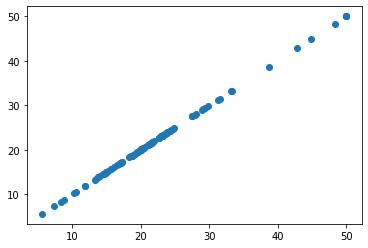

In [ ]:
plt.scatter(Y_test,pred_test)

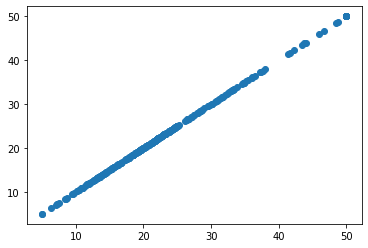

In [ ]:
plt.scatter(Y_train,pred_train)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred_test))

Mean Absolute Error: 3.047671047990626e-14


# THANK YOU